# Introdução
Vamos trabalhar com o [Conjunto de dados de cogumelos da UCI ](http://archive.ics.uci.edu/ml/datasets/Mushroom?ref=datanews.io) armazenado em `cogumelos.csv` .
Os dados em cogumelos.csv estão codificados com strings, iremos modificar eles para uma codificação numerica e assim poder trabalhar com a biblioteca sklearn. Estes dados serão usados para testar um modelo e prever se um cogumelo é venenoso ou não. 

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


cogu_df = pd.read_csv('dados/cogumelos.csv')
cogu_df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


Os seguintes atributos são fornecidos:

1. cap-shape: bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s 
2. cap-surface: fibrous=f, grooves=g, scaly=y, smooth=s 
3. cap-color: brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y 
4. bruises?: bruises=t, no=f 
5. odor: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s 
6. gill-attachment: attached=a, descending=d, free=f, notched=n 
7. gill-spacing: close=c, crowded=w, distant=d 
8. gill-size: broad=b, narrow=n 
9. gill-color: black=k, brown=n, buff=b, chocolate=h, gray=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y 
10. stalk-shape: enlarging=e, tapering=t 
11. stalk-root: bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=? 
12. stalk-surface-above-ring: fibrous=f, scaly=y, silky=k, smooth=s 
13. stalk-surface-below-ring: fibrous=f, scaly=y, silky=k, smooth=s 
14. stalk-color-above-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y 
15. stalk-color-below-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y 
16. veil-type: partial=p, universal=u 
17. veil-color: brown=n, orange=o, white=w, yellow=y 
18. ring-number: none=n, one=o, two=t 
19. ring-type: cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z 
20. spore-print-color: black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y 
21. population: abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y 
22. habitat: grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d

<br>

In [104]:
cogu_df2 = pd.get_dummies(cogu_df) # Usamos pd.get_dummies para converter as variáveis ​​categóricas em variáveis ​​indicadoras

X_cogu = cogu_df2.iloc[:,2:]
y_cogu = cogu_df2.iloc[:,1]

X_train, X_test, y_train, y_test = train_test_split(X_cogu, y_cogu, random_state=0)

Usando `X_train` e `y_train`, vamos treinar o modelo DecisionTreeClassifier com parâmetros padrão e random_state=0. 

In [105]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

Estimando a precisão do classificador 

In [107]:
print('Estimando a precisão do classificador em dados futuros, usando os dados de treino: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('AEstimando a precisão do classificador em dados futuros, usando os dados de teste: {:.2f}'
     .format(clf.score(X_test, y_test)))

Estimando a precisão do classificador em dados futuros, usando os dados de treino: 1.00
AEstimando a precisão do classificador em dados futuros, usando os dados de teste: 1.00


Vamos criar uma função que retorne os nomes dos 5 recursos mais importantes encontrados pela árvore de decisão.

In [108]:
def top5_recursos():
    
    feature_importances = clf.feature_importances_
    
    top5_idx = feature_importances.argsort()[-5:][::-1]
    
    top5_features = X_train.columns[top5_idx].tolist()
    
    return top5_features

In [109]:
top5_recursos()

['odor_n', 'stalk-root_c', 'stalk-root_r', 'spore-print-color_r', 'odor_l']

Vamos usar a função `validation_curve` em `sklearn.model_selection` para determinar pontuações de treinamento e teste para um Support Vector Classifier (`SVC`) com valores de parâmetros variados. Iniciaremos criando um `SVC` com parâmetros padrão (ou seja, `kernel='rbf', C=1`) e `random_state=0`.

In [119]:
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve
    
svc = SVC(kernel='rbf', C=1, random_state=0)

Exploraremos o efeito de `gamma` na precisão do classificador usando a função `validation_curve` para encontrar as pontuações de treinamento e teste para 6 valores de `gamma` de `0,0001` a `10` (ou seja, `np.logspace(-4,1 ,6)`). Para cada nível de `gamma`, a função `validation_curve` usará validação cruzada tripla (`cv=3`), retornando dois matrizes 6x3 (6 níveis de gama x 3 ajustes por nível ) das pontuações dos conjuntos de treinamento e teste em cada dobra. Posterioemente, calcularemos a pontuação média dos tres modelos para cada nível de `gama` para ambas as matrizes, criando duas matrizes de comprimento 6 e retornando uma tupla com as duas matrizes.

In [120]:
def Pontos_treino_teste():
      
    param_range = np.logspace(-4, 1, 6)
    
    train_scores, teste_scores = validation_curve(svc, X_train, y_train, param_name='gamma', param_range=param_range, cv=3)

    training_scores = np.mean(train_scores, axis=1)

    test_scores = np.mean(teste_scores, axis=1)
    
    return (training_scores, test_scores)

In [113]:
mean_train_scores, mean_test_scores = Pontos_treino_teste()

Com base nas pontuações anteriores, vamos determinar para cada valor de gama o correspondente modelo que apresenta `Underfitting`, `Overfitting` e `boa generalização` neste conjunto de dados.



In [35]:
def gama_under_over_good():
    #mean_train_scores, mean_test_scores = Pontos_treino_teste()
    
    param_range = np.logspace(-4, 1, 6)

    plt.figure(figsize=(10, 6))
    plt.plot(param_range, mean_train_scores, label='Training score', color='r')
    plt.plot(param_range, mean_test_scores, label='Test score', color='g')
    plt.xscale('log')
    plt.xlabel('Gamma')
    plt.ylabel('Pontuação')
    plt.title('Curva de validação com SVM')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

    
    underfitting_gamma = param_range[np.argmin(mean_train_scores)]
    overfitting_gamma = param_range[np.argmin(mean_test_scores-mean_train_scores)]
    boa_generalizacacao_gamma = param_range[np.argmax(mean_test_scores)]

    return (underfitting_gamma, overfitting_gamma, boa_generalizacacao_gamma)

*Esta função retorna uma tupla com os valores dos graus nesta ordem: `(Underfitting, Overfitting, boa_Generalização)`*

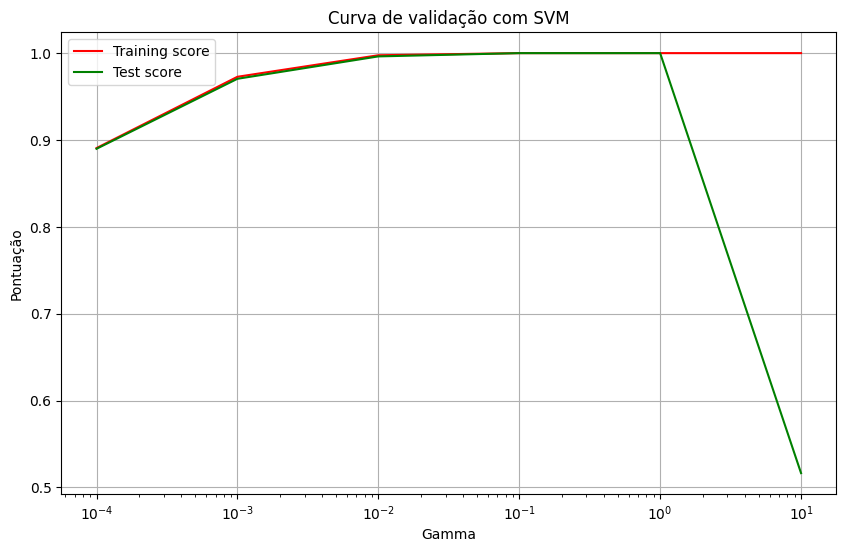

(0.0001, 10.0, 0.1)

In [114]:
gama_under_over_good()